# Forwards Player Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from convert_points import convert_points

## Read and pre-process data

In [2]:
data_path = '../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_path, low_memory = False)
seasons = ['2020-21', '2021-22', '2022-23']
data_df = seasons_df.loc[seasons_df.season_x.isin(seasons),:]
data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})
data_df

C:\Users\Andrew\AppData\Local\Temp\ipykernel_16916\1614898048.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.position = data_df.position.map({'DEF':'DEF','FWD':'FWD','GK':'GK','GKP':'GK','MID':'MID'})


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,1.0,32.0,1,0,0,0,55,True,0,1
19853,2020-21,Aaron Cresswell,DEF,West Ham,0,0,11,0,11.2,435,...,0.0,0.0,1,0,0,0,50,True,0,1
19854,2020-21,Aaron Mooy,MID,Brighton,0,0,0,0,0.0,60,...,1.0,0.0,0,0,0,0,50,True,0,1
19855,2020-21,Aaron Ramsdale,GK,Sheffield Utd,0,0,12,0,0.0,483,...,0.0,0.0,1,0,0,0,50,True,0,1
19856,2020-21,Abdoulaye Doucouré,MID,Everton,0,0,20,1,44.6,512,...,0.0,4.0,3,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1.0,0.0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1.0,0.0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2.0,0.0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2.0,0.0,0,-17,22,39,45,False,0,38


In [3]:
FWD_df = data_df.loc[data_df.position == 'FWD',:]
FWD_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
19852,2020-21,Aaron Connolly,FWD,Brighton,0,0,-3,0,0.3,78,...,1.0,32.0,1,0,0,0,55,True,0,1
19866,2020-21,Albian Ajeti,FWD,West Ham,0,0,0,0,0.0,447,...,0.0,0.0,0,0,0,0,55,True,0,1
19867,2020-21,Aleksandar Mitrović,FWD,Fulham,0,0,3,0,0.3,184,...,0.0,7.0,1,0,0,0,60,True,0,1
19868,2020-21,Alexandre Lacazette,FWD,Arsenal,0,1,29,1,12.7,6,...,0.0,48.0,7,0,0,0,85,False,0,1
19885,2020-21,Andy Carroll,FWD,Newcastle,0,0,3,1,14.0,320,...,0.0,48.0,2,0,0,0,55,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96120,2022-23,Lyle Taylor,FWD,Nott'm Forest,0,0,0,0,0.0,380,...,1.0,0.0,0,4992,11390,6398,41,False,0,38
96123,2022-23,Deniz Undav,FWD,Brighton,0,0,23,0,0.0,123,...,2.0,0.0,5,-13569,4263,17832,50,False,1,38
96126,2022-23,Wilfried Gnonto,FWD,Leeds,0,0,4,0,0.0,619,...,1.0,0.0,1,346,4706,4360,47,True,0,38
96134,2022-23,Jhon Durán,FWD,Aston Villa,0,0,0,0,0.0,711,...,2.0,0.0,0,-126,174,300,55,True,0,38


## Which players had the highest median score from 2020/21 - 2022/23?

As seen in the points distributions per position plots, the total points scored by forwards have a right skew. Outliers can inflate the mean compared to the median which is more robust.

In [4]:
top_15_FWDs = FWD_df.loc[:,['name','total_points']].groupby(['name']).median()
top_15_FWDs.sort_values(by = 'total_points', ascending = False, inplace = True)
top_15_FWDs = top_15_FWDs.iloc[0:15,:]
top_15_FWDs

,total_points
name,
Harry Kane,6.0
Erling Haaland,6.0
Jordan Ayew,2.0
Teemu Pukki,2.0
Danny Ings,2.0
Bobby Decordova-Reid,2.0
Brennan Johnson,2.0
Bryan Mbeumo,2.0
Daniel Jebbison,2.0


So it turns out the median is a fairly useless metric, besides showing that Haaland and Kane are practically in a league of their own.

## Which players had the highest mean score from 2020/21 - 2022/23?

In [5]:
top_15_FWDs = FWD_df.loc[:,['name','total_points']].groupby(['name']).mean()
top_15_FWDs.sort_values(by = 'total_points', ascending = False, inplace = True)
top_15_FWDs = top_15_FWDs.iloc[0:15,:]
top_15_FWDs

,total_points
name,
Erling Haaland,7.157895
Harry Kane,6.114035
Ivan Toney,4.223684
Ollie Watkins,4.157895
Bryan Mbeumo,3.947368
Teemu Pukki,3.736842
Jamie Vardy,3.526316
Dominic Solanke,3.421053
Callum Wilson,3.210526


In [6]:
top_15_FWD_names = list(top_15_FWDs.index)
top_15_FWD_names

['Erling Haaland',
 'Harry Kane',
 'Ivan Toney',
 'Ollie Watkins',
 'Bryan Mbeumo',
 'Teemu Pukki',
 'Jamie Vardy',
 'Dominic Solanke',
 'Callum Wilson',
 'Brennan Johnson',
 'Mbaye Diagne',
 'Gabriel Fernando de Jesus',
 'Allan Saint-Maximin',
 'Daniel Jebbison',
 'Michail Antonio']

## Extract points data for each of these players and generate boxplots:

In [7]:
points_data = []
for name in top_15_FWD_names:
    points_data.append(FWD_df.loc[FWD_df.name == name,'total_points'].values.astype(float))

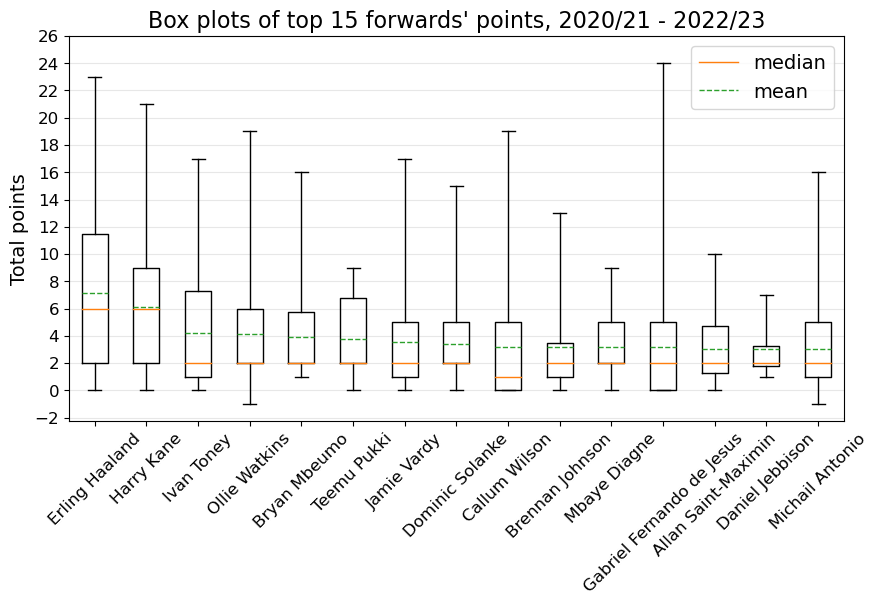

In [8]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
box_dict = ax.boxplot(points_data, whis=(0,100), labels = top_15_FWD_names, meanline = True, showmeans = True)
_ = ax.set_xticklabels(ax.get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
_ = ax.set_yticks(np.arange(-2,28,2))
_ = ax.set_yticklabels(ax.get_yticklabels(), fontsize = axis_tick_font)
ax.set_ylabel('Total points', fontsize = axis_label_font)
ax.grid(axis = 'y', alpha = 0.3)
ax.legend([box_dict['medians'][0], box_dict['means'][0]], ['median', 'mean'], fontsize = legend_font)
ax.set_title('''Box plots of top 15 forwards' points, 2020/21 - 2022/23''', fontsize = axis_title_font)
plt.savefig('./plots/top_15_FWDs_boxplots.png')
plt.show()

## How are these points scored?

In [9]:
FWD_stats_df = FWD_df.loc[FWD_df.name.isin(top_15_FWD_names), ['name', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'saves',
                          'penalties_saved', 'penalties_missed', 'goals_conceded', 'yellow_cards',
                          'red_cards', 'own_goals', 'bonus','total_points']]
FWD_stats_df

,name,minutes,goals_scored,assists,clean_sheets,saves,penalties_saved,penalties_missed,goals_conceded,yellow_cards,red_cards,own_goals,bonus,total_points
19912,Callum Wilson,84,1,0,1,0,0,0,0,0,0,0,2,8
20001,Harry Kane,90,0,0,0,0,0,0,1,0,0,0,0,2
20035,Jamie Vardy,90,2,0,1,0,0,0,0,0,0,0,3,13
20149,Michail Antonio,90,0,0,0,0,0,0,2,0,0,0,0,2
20358,Callum Wilson,90,0,0,0,0,0,0,3,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95790,Ollie Watkins,90,1,0,0,0,0,0,1,0,0,0,3,9
95803,Jamie Vardy,13,0,0,0,0,0,0,1,0,0,0,0,1
95924,Callum Wilson,21,0,0,0,0,0,0,0,0,0,0,0,1
95987,Harry Kane,90,2,1,0,0,0,0,1,0,0,0,3,16


In [10]:
FWD_points_df = convert_points('FWD', FWD_stats_df)
FWD_points_df = FWD_points_df.groupby('name').mean()
FWD_points_df.sort_values(by = 'total_points', ascending = False, inplace = True)
FWD_points_df.drop(columns=['clean_sheets', 'saves', 'penalties_saved', 'goals_conceded', 'total_points'], inplace=True)
FWD_points_df

,minutes,goals_scored,assists,penalties_missed,yellow_cards,red_cards,own_goals,bonus
name,,,,,,,,
Erling Haaland,1.736842,3.789474,0.710526,0.000000,-0.131579,0.000000,0.000000,1.052632
Harry Kane,1.912281,2.456140,0.894737,-0.017544,-0.105263,0.000000,0.000000,0.973684
Ivan Toney,1.723684,1.684211,0.355263,-0.026316,-0.223684,0.000000,0.000000,0.710526
Ollie Watkins,1.877193,1.403509,0.526316,-0.035088,-0.114035,-0.026316,0.000000,0.526316
Bryan Mbeumo,1.921053,0.947368,0.710526,0.000000,-0.131579,0.000000,0.000000,0.500000
Teemu Pukki,1.947368,1.157895,0.236842,0.000000,-0.105263,0.000000,0.000000,0.500000
Jamie Vardy,1.429825,1.157895,0.578947,-0.035088,-0.035088,0.000000,-0.017544,0.447368
Dominic Solanke,1.684211,0.631579,0.789474,0.000000,-0.052632,0.000000,0.000000,0.368421
Brennan Johnson,1.842105,0.842105,0.394737,-0.105263,-0.157895,0.000000,0.000000,0.394737


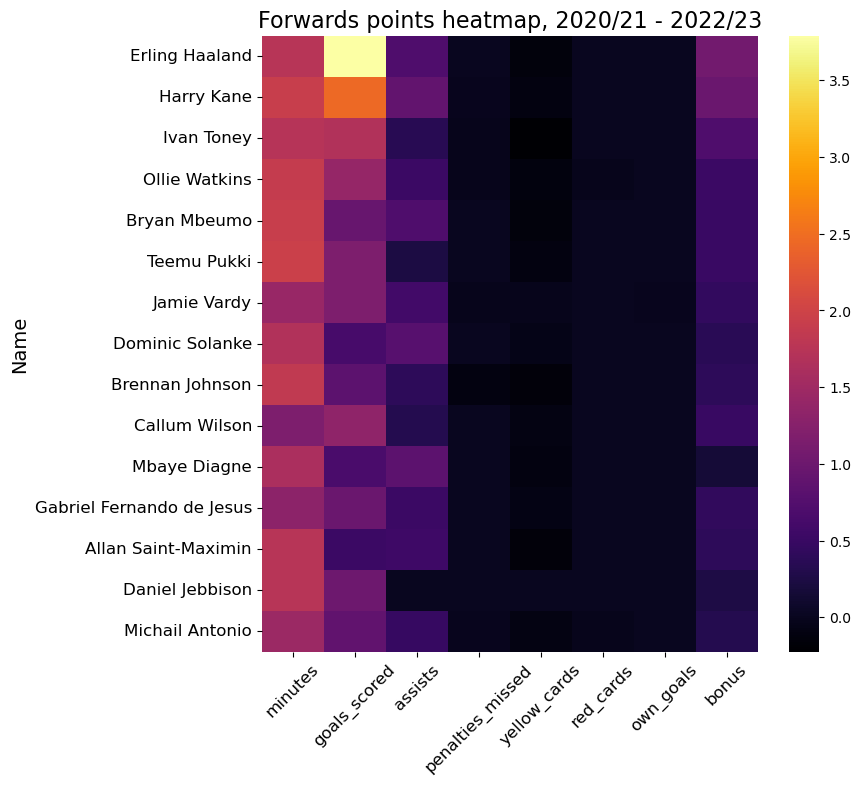

<Figure size 640x480 with 0 Axes>

In [11]:
title_font = 18
axis_title_font = 16
legend_font = 14
axis_label_font = 14
axis_tick_font = 12

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.heatmap(FWD_points_df, ax = ax, cmap='inferno')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = axis_tick_font, rotation = 45)
ax.set_yticklabels(ax.get_yticklabels(), fontsize = axis_tick_font)
ax.set_ylabel('Name', fontsize = axis_label_font)
ax.set_title('Forwards points heatmap, 2020/21 - 2022/23', fontsize = axis_title_font)
plt.show()
plt.savefig('./plots/FWD_points_heatmap.png')

## So, how does all of this compare to the latest season (2023/24)?

In [12]:
path_2023_24 = '../data/Fantasy-Premier-League/data/2023-24/gws/merged_gw.csv'
data_2023_24 = pd.read_csv(path_2023_24, low_memory = False)
#data_2023_24 = data_2023_24.loc[data_2023_24.position == 'FWD', :]
data_2023_24

,name,position,team,xP,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,Femi Seriki,DEF,Sheffield Utd,0.5,0,0,0,0,0.0,653,...,0,0.0,0,0,0,0,40,True,0,1
1,Jack Hinshelwood,MID,Brighton,1.5,0,0,0,0,0.0,621,...,4,0.0,0,0,0,0,45,True,0,1
2,Jadon Sancho,MID,Man Utd,3.0,0,0,4,0,11.3,397,...,1,8.0,1,0,0,0,70,True,0,1
3,Rhys Norrington-Davies,DEF,Sheffield Utd,0.1,0,0,0,0,0.0,487,...,0,0.0,0,0,0,0,40,True,0,1
4,Vitaly Janelt,MID,Brentford,2.1,0,0,6,0,11.5,105,...,2,17.0,2,0,0,0,55,True,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933,Kyle Walker,DEF,Man City,6.2,0,0,20,0,46.3,369,...,1,11.0,2,282609,315193,32584,51,False,0,3
1934,Jacob Brown,FWD,Luton,1.5,0,0,-2,0,0.3,631,...,3,9.0,0,-124,2500,2624,50,False,1,3
1935,Vicente Guaita,GK,Crystal Palace,0.0,0,0,0,0,0.0,227,...,1,0.0,0,-7273,968,8241,45,False,0,3
1936,Braian Ojeda Rodríguez,MID,Nott'm Forest,0.0,0,0,0,0,0.0,459,...,3,0.0,0,-73,0,73,45,False,0,3


In [13]:
FWDs_2023_24 = data_2023_24.loc[:,['name','total_points']].groupby('name').mean()
FWDs_2023_24

,total_points
name,
Aaron Connolly,0.000000
Aaron Cresswell,0.000000
Aaron Hickey,2.333333
Aaron Ramsdale,3.000000
Aaron Ramsey,1.000000
...,...
Yves Bissouma,2.333333
Zack Steffen,0.000000
Zeki Amdouni,2.000000


In [14]:
FWDs_2020_23 = FWD_df.loc[:,['name','total_points']].groupby(['name']).mean()
FWDs_2020_23

,total_points
name,
Aaron Connolly,0.565789
Abu Kamara,0.000000
Adam Armstrong,1.460526
Adam Idah,0.947368
Adedapo Awokoya-Mebude,0.000000
...,...
Wilfried Gnonto,1.666667
William Osula,0.000000
Willian José Da Silva,2.105263


In [15]:
FWDs_all_seasons = FWDs_2020_23.join(FWDs_2023_24, how='outer', lsuffix='_2020_23', rsuffix = '_2023_24')
FWDs_all_seasons

,total_points_2020_23,total_points_2023_24
name,,
Aaron Connolly,0.565789,0.000000
Aaron Cresswell,NaN,0.000000
Aaron Hickey,NaN,2.333333
Aaron Ramsdale,NaN,3.000000
Aaron Ramsey,NaN,1.000000
...,...,...
Yves Bissouma,NaN,2.333333
Zack Steffen,NaN,0.000000
Zeki Amdouni,NaN,2.000000


### How have the top scoring forwards from 2020/21 - 2022/23 fared so far?

In [16]:
FWDs_all_seasons.sort_values(by = 'total_points_2020_23', ascending = False).iloc[0:15,:]

,total_points_2020_23,total_points_2023_24
name,,
Erling Haaland,7.157895,6.333333
Harry Kane,6.114035,0.000000
Ivan Toney,4.223684,0.000000
Ollie Watkins,4.157895,5.000000
Bryan Mbeumo,3.947368,8.333333
Teemu Pukki,3.736842,NaN
Jamie Vardy,3.526316,NaN
Dominic Solanke,3.421053,4.666667
Callum Wilson,3.210526,2.333333


outer join top 15 FWDs from 2020/21 - 2022/23 and 2023/24. 1 column for points in first 3 seasons and 1 column for points this season. Calculate effect size and p-values. Then join with their current value and calculate their points/per million. Use this to identify value players.

Actually, maybe take all FWDs this season and use this to filter forwards from 2020/21 to 2022/23. Because we don't really care about their historic stats - we're trying to identify good players to select this season based on their historic performance over the last 3 seasons. so re-run whole analysis with this in mind, being careful of convert_points which may require multiple calls based on position. Then join this seasons data and continue from there.